### **Pembelajaran Mesin H**
### **Muhammad Aqil Farrukh / 502522158**
### **Tugas K-Means Clustering**


Tugas Individu: Mengerjakan Hands Lab dari K-Means Clustering pada Machine Learning with Python | Cognitive Class.
1. Kelompokkan data sintetik hasil generate secara random, jika jumlah cluster adalah 2 dan 3.
2. Selesaikan permasalahan dataset penjualan mobil menggunakan K-Means Clustering, lalu analisis hasil clustering. Silakan Anda juga bisa melakukan EDA (Exploratory Data Analysis) maupun data preprocessing sesuai kebutuhan.
 
Link Dataset: https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data/data

### **1. Menggunakan data random sama dengan pada Lab K-Means pada Cognitive Class ML, akan dilakukan K-Means Clustering dengan jumlah cluster 2 dan 3**

Import Library

1. Mensuppress Warnings: Kode pertama mendefinisikan sebuah fungsi warn() yang tidak melakukan apa-apa (pass). Kemudian, modul warnings diimpor, dan fungsi warn() yang telah didefinisikan sebelumnya digunakan untuk menggantikan fungsi warn bawaan dari modul tersebut. Hal ini dimaksudkan untuk menonaktifkan atau menyuppress pesan peringatan yang mungkin muncul selama eksekusi kode.

2. Import Libraries: Kode tersebut mengimpor beberapa library yang umum digunakan dalam analisis data dan pembelajaran mesin, termasuk:

* random: Untuk menghasilkan bilangan acak.
* numpy (diimpor sebagai np): Library yang digunakan untuk operasi numerik dan array.
* pandas (diimpor sebagai pd): Library yang digunakan untuk  manipulasi dan analisis data.
* matplotlib.pyplot (diimpor sebagai plt): Library yang digunakan untuk membuat visualisasi data.
* sklearn.cluster.KMeans: Kelas yang digunakan untuk melakukan klasterisasi dengan metode K-Means.
* sklearn.datasets.make_blobs: Fungsi yang digunakan untuk membuat dataset berbentuk blob (bercak) dengan berbagai properti tertentu.
3.  Inline Plotting: %matplotlib inline adalah sebuah magic command yang digunakan dalam lingkungan Jupyter Notebook atau IPython untuk menampilkan plot matplotlib di dalam notebook secara langsung setelah kode.

Dengan demikian, keseluruhan kode tersebut persiapan awal untuk melakukan analisis data dan klasterisasi dengan menggunakan K-Means, serta menampilkan visualisasi hasilnya di dalam notebook.

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline


Baris kode np.random.seed(0) digunakan untuk menetapkan nilai awal (seed) dari generator nomor acak NumPy ke nilai tertentu, dalam hal ini adalah 0.

Penggunaan seed ini penting karena generator nomor acak akan menghasilkan serangkaian angka acak yang sama jika seed yang sama digunakan. Dengan menetapkan seed, kita dapat membuat hasil dari fungsi-fungsi yang menggunakan nomor acak menjadi deterministik dan dapat direproduksi.

In [2]:
np.random.seed(0)

Membuat cluster random dengan 5000 titik, center [[4, 4], [-2, -1], [2, -3],[1,1]], dan standar deviasi cluter sebesar 0.9

Maka akan dihasilkan X, y yang merupakan array of shape

In [3]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Display scatter plot data yang telah dibuat

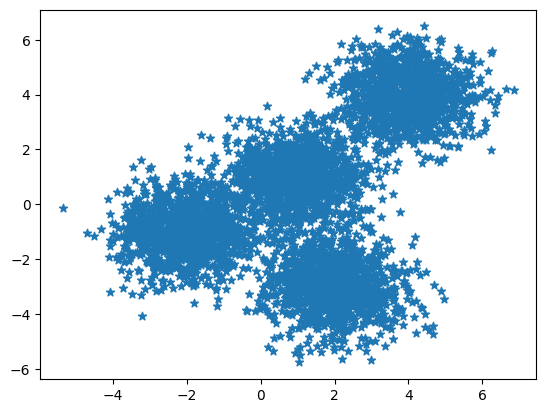

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker='*')

# **Mengimplementasikan K-Means**

init: "k-means++", yang akan memilih cluster secara cerdas untuk mempercepat konvergensi.

n_clusters: 3 dan 2 (sesuai dengan soal), yang akan menentukan jumlah cluster.

n_init: 12, berapa kali k-means akan dijalankan dengan centroid awal yang berbeda, untuk menghasilkan output yang terbaik.

In [5]:
k_means = KMeans(init="k-means++", 
                 n_clusters=3, 
                 n_init=12)

In [6]:
k_means.fit(X)

  File "d:\ITS\SEMESTER 4\machine learning\tugas k-mean\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KMeans(n_clusters=3, n_init=12)

Mengambil label untuk setiap poin dan koordinat titik tengah cluster 

In [7]:
k_means_labels = k_means.labels_

k_means_centers = k_means.cluster_centers_


### **Membuat Visual Plot**

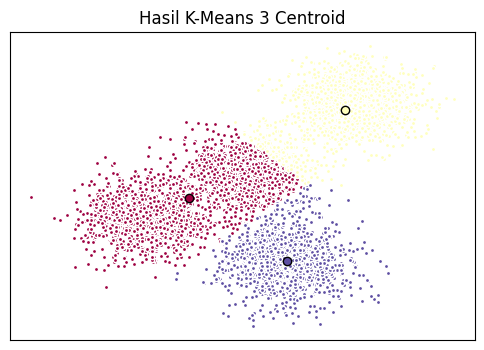

In [8]:
# Inisialisasi plot dengan dimensi yang ditentukan.
fig = plt.figure(figsize=(6, 4))

# Colors menggunakan peta warna, yang akan menghasilkan array warna berdasarkan
# jumlah label yang ada. Kami menggunakan set(k_means_labels) untuk mendapatkan
# label unik.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Buat plot
ax = fig.add_subplot(1, 1, 1)

# Loop for yang memplot titik data dan centroid.
# k akan berjalan dari 0-3, yang akan sesuai dengan cluster yang mungkin dari masing-masing
# titik data.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Buat daftar semua titik data, di mana titik data yang berada dalam
    # dalam cluster (mis. cluster 0) diberi label sebagai true, jika tidak diberi label sebagai false.
    my_members = (k_means_labels == k)
    
    # Tentukan centroid, atau pusat cluster.
    cluster_center = k_means_centers[k]
    
    # Plot titik data dengan warna col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plot centroid dengan warna yang ditentukan, tetapi dengan kontur yang lebih gelap
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Judul plot
ax.set_title('Hasil K-Means 3 Centroid')

# Hapus tanda centang sumbu x
ax.set_xticks(())

# Hapus tanda centang sumbu y
ax.set_yticks(())

# Tampilkan plot
plt.show()


**Untuk 2 Centroid:**

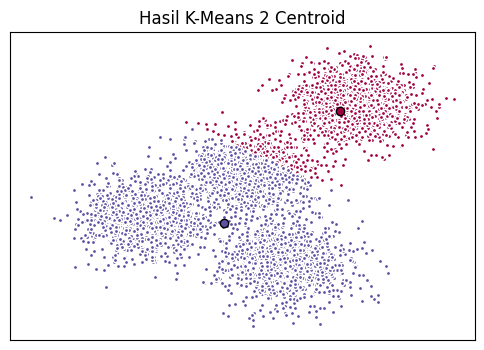

In [9]:
# Implementasi K-Means

k_means = KMeans(init="k-means++", 
                 n_clusters=2, 
                 n_init=12)
k_means.fit(X)


# Ambil atribut yang diperlukan

k_means_labels = k_means.labels_
k_means_centers = k_means.cluster_centers_


#Visualisasi Hasil K-Means

fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('Hasil K-Means 2 Centroid')
ax.set_xticks(())
ax.set_yticks(())

plt.show()


#### **2. Menggunakan dataset penjualan mobil, dilakukan data preprocessing, EDA, dan K-Means Clustering, lalu analisis hasil K-Means**


Baris kode dataF = pd.read_csv('car_prices.csv') digunakan untuk membaca file CSV yang disebut 'car_prices.csv' ke dalam sebuah DataFrame menggunakan fungsi read_csv dari modul pandas.

Kemudian, dataF.head() digunakan untuk menampilkan lima baris pertama dari DataFrame dataF.

Jadi, dengan menggunakan kode ini, kita mengimpor data dari file CSV ke dalam sebuah DataFrame dan kemudian menampilkan lima baris pertama dari DataFrame tersebut.

In [10]:
dataF = pd.read_csv('car_prices.csv')
dataF.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


Fungsi dataF.info() memberikan ringkasan singkat tentang struktur dan informasi dari DataFrame dataF. Ini mencakup beberapa informasi penting seperti:

Jumlah total baris (entries) dalam DataFrame.
Jumlah kolom (columns) dalam DataFrame.
Daftar nama kolom beserta tipe data masing-masing kolom.
Jumlah nilai non-null (non-missing) dalam setiap kolom.
Penggunaan memori oleh DataFrame.
Dengan menjalankan dataF.info(), kita akan mendapatkan pemahaman yang lebih baik tentang struktur dan isi dari DataFrame dataF, termasuk apakah terdapat nilai yang hilang (missing values) dalam dataset dan tipe data dari setiap kolomnya.

In [11]:
dataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


Kemudian panggilan dataF.describe(include='all') memberikan ringkasan statistik deskriptif dari DataFrame dataF, termasuk kolom-kolom dengan tipe data numerik dan kategorikal. Ini mencakup informasi seperti:

* Count: Jumlah entri non-null (non-missing) untuk setiap kolom.
* Mean: Rata-rata nilai untuk setiap kolom.
* Std: Standar deviasi dari nilai untuk setiap kolom.
* Min: Nilai minimum untuk setiap kolom.
* 25th, 50th, 75th percentile: Kuartil ke-25, ke-50 (median), dan ke-75 untuk setiap kolom.
* Max: Nilai maksimum untuk setiap kolom.

In [12]:
dataF.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,558837.000000,548536,548438,548186,545642,493485,558833,558837,547017.000000,558743.000000,558088,558088,558837,558799.000000,558825.000000,558825
unique,NaN,96,973,1963,87,4,550297,64,NaN,NaN,46,17,14263,NaN,NaN,3766
top,NaN,Ford,Altima,Base,Sedan,automatic,automatic,fl,NaN,NaN,black,black,nissan-infiniti lt,NaN,NaN,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,93554,19349,55817,199437,475915,22,82945,NaN,NaN,110970,244329,19693,NaN,NaN,5334
mean,2010.038927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.672365,68320.017767,NaN,NaN,NaN,13769.377495,13611.358810,NaN
std,3.966864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.402832,53398.542821,NaN,NaN,NaN,9679.967174,9749.501628,NaN
min,1982.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,25.000000,1.000000,NaN
25%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,28371.000000,NaN,NaN,NaN,7100.000000,6900.000000,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,52254.000000,NaN,NaN,NaN,12250.000000,12100.000000,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,99109.000000,NaN,NaN,NaN,18300.000000,18200.000000,NaN


Panggilan dataF.isnull().sum() digunakan untuk menghitung jumlah nilai yang hilang (missing values) dalam setiap kolom DataFrame dataF.

Misalnya, jika sebuah kolom memiliki nilai null, jumlahnya akan dihitung dan ditampilkan. Jika sebuah kolom tidak memiliki nilai null, maka jumlahnya akan nol.

In [13]:
dataF.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


Panggilan dataF.duplicated().sum() digunakan untuk menghitung jumlah baris yang duplikat dalam DataFrame dataF.

Jika sebuah baris dianggap duplikat, artinya baris tersebut memiliki entri yang identik dengan baris lain dalam DataFrame. Metode duplicated() akan menghasilkan Series boolean yang menandai setiap baris sebagai duplikat atau tidak. Kemudian, dengan memanggil sum(), kita dapat menghitung jumlah baris yang dianggap duplikat (yaitu, memiliki nilai True dalam Series boolean).

In [14]:
dataF.duplicated().sum()

0

**Penjelasan Tentang Atribut Data**

Atribut Numerik:
1. Year: Tahun pembuatan kendaraan.
2. Condition: Representasi angka dari kondisi fisik kendaraan.
3. Odometer: Jarak yang telah ditempuh oleh kendaraan.
4. MMR: Laporan Pasar Manheim, alat penetapan harga standar dalam industri otomotif.
5. Selling Price: Harga penjualan kendaraan.

Atribut Kategorikal:
1. Make: Produsen atau merek kendaraan.
2. Model: Model khusus dari kendaraan.
3. Trim: Penanda tambahan untuk varian atau paket opsional tertentu dari model.
4. Body: Jenis fisik atau struktur kendaraan.
5. Transmission: Jenis transmisi yang dipakai dalam kendaraan.
6. VIN: Nomor Identifikasi Kendaraan, kode unik untuk identifikasi kendaraan individu.
7. State: Negara bagian tempat kendaraan berada atau terdaftar.
8. Color: Warna eksterior kendaraan.
9. Interior: Warna interior kendaraan.
10. Seller: Entitas atau perusahaan yang menjual kendaraan.
11. Sale Date: Tanggal dan waktu penjualan kendaraan.

**Permasalahan yang Terdapat pada Data:**

1. Terdapat banyak kolom, baik numerik maupun kategorikal, yang memiliki nilai null.
2. Beberapa atribut mungkin tidak relevan atau tidak akan digunakan dalam Analisis Eksplorasi Data (EDA) dan Klasterisasi K-Means.

### **Data Cleaning**

Data cleaning adalah proses penting dalam analisis data yang bertujuan untuk membersihkan, menormalkan, dan mempersiapkan data agar dapat digunakan untuk analisis lebih lanjut. Proses ini melibatkan identifikasi dan penanganan masalah yang umum terjadi dalam data seperti nilai yang hilang, data duplikat, format yang tidak tepat, dan outlier.

In [15]:
df = dataF.drop(['model', 'make', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate'], axis=1)
df.head()   

,year,condition,odometer,mmr,sellingprice
0,2015,5.0,16639.0,20500.0,21500.0
1,2015,5.0,9393.0,20800.0,21500.0
2,2014,45.0,1331.0,31900.0,30000.0
3,2015,41.0,14282.0,27500.0,27750.0
4,2014,43.0,2641.0,66000.0,67000.0


Kode diatas menggunakan metode .drop() dari pandas untuk menghapus beberapa kolom tertentu dari DataFrame dataF dan menyimpan hasilnya ke dalam DataFrame baru yang disebut df. Kolom-kolom yang dihapus adalah: 'model', 'make', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', dan 'saledate'.

Parameter axis=1 digunakan untuk menunjukkan bahwa yang dihapus adalah kolom, bukan baris.

Setelah itu, .head() digunakan untuk menampilkan lima baris pertama dari DataFrame df yang telah dimodifikasi.

Jadi, kode tersebut memproses DataFrame dataF dengan menghapus beberapa kolom yang mungkin tidak diperlukan untuk analisis lebih lanjut, dan menampilkan lima baris pertama dari DataFrame yang telah dimodifikasi.

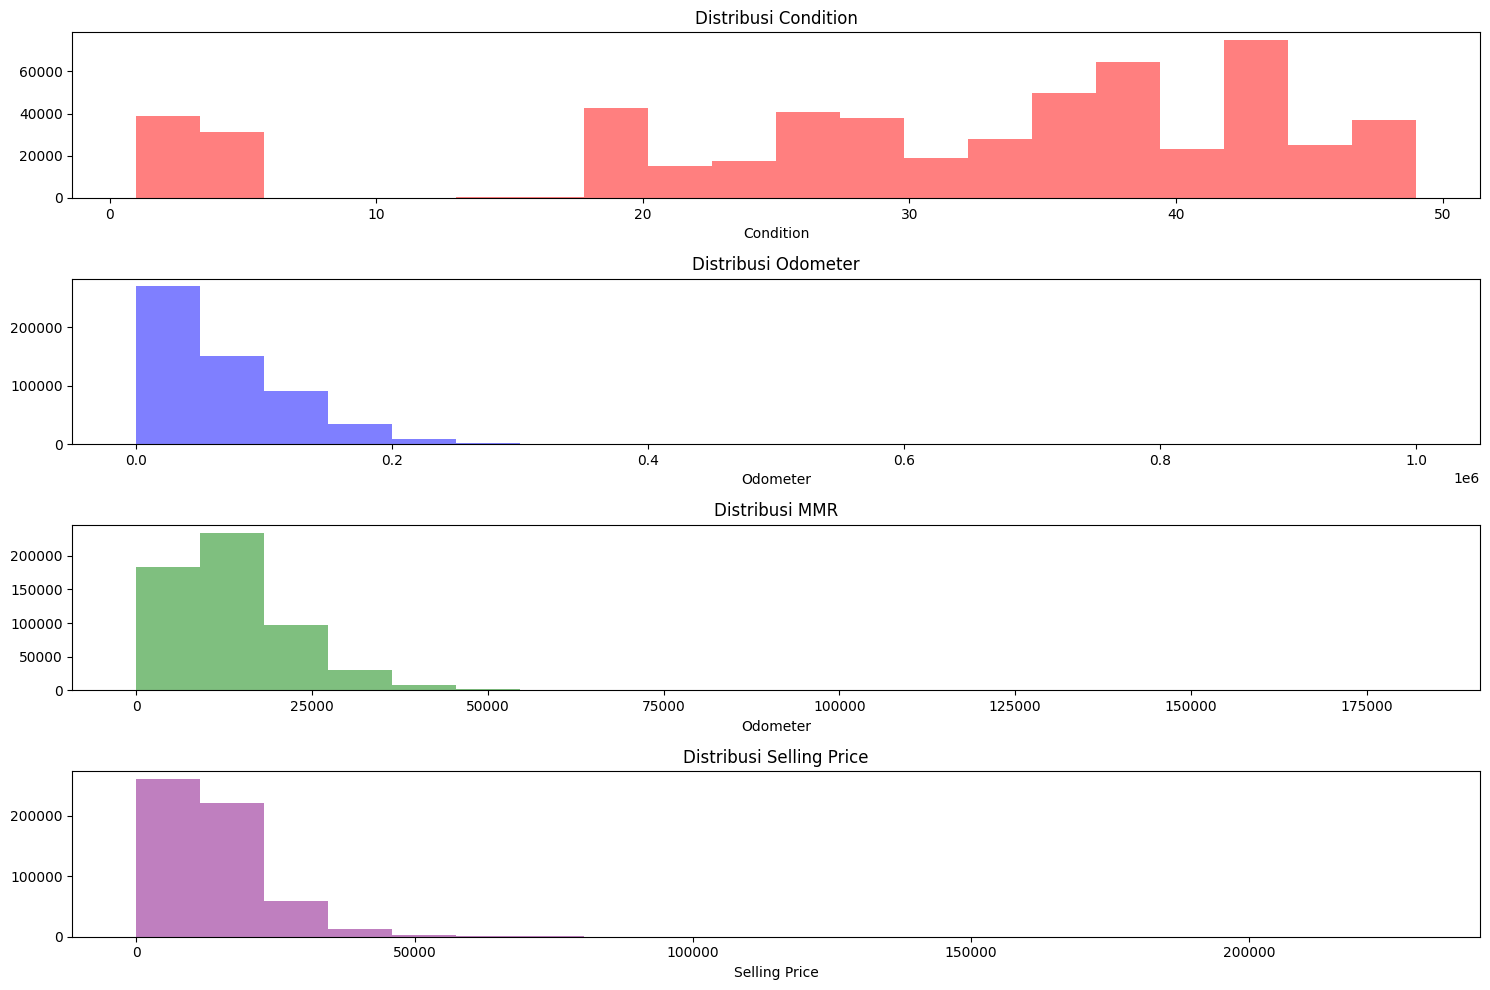

In [16]:
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.hist(df['condition'].dropna(), bins=20, color='red', alpha=0.5)
plt.title('Distribusi Condition')
plt.xlabel('Condition')

plt.subplot(4, 1, 2)
plt.hist(df['odometer'].dropna(), bins=20, color='blue', alpha=0.5)
plt.title('Distribusi Odometer')
plt.xlabel('Odometer')

plt.subplot(4, 1, 3)
plt.hist(df['mmr'].dropna(), bins=20, color='green', alpha=0.5)
plt.title('Distribusi MMR')
plt.xlabel('Odometer')

plt.subplot(4, 1, 4)
plt.hist(df['sellingprice'].dropna(), bins=20, color='purple', alpha=0.5)
plt.title('Distribusi Selling Price')
plt.xlabel('Selling Price')

plt.tight_layout()
plt.show()

Kode diatas menggunakan Matplotlib untuk membuat empat subplot dengan ukuran total 15x10. Setiap subplot menampilkan histogram dari kolom-kolom numerik dalam DataFrame `df`, yaitu 'condition', 'odometer', 'mmr', dan 'sellingprice'.

- Setiap subplot menggunakan `plt.hist()` untuk membuat histogram dari data yang diambil dari kolom yang sesuai. Nilai-nilai yang hilang (NaN) dihapus dengan menggunakan metode `.dropna()` sebelum membuat histogram.
- Parameter `bins=20` digunakan untuk menentukan jumlah bins (pengelompokan) yang digunakan dalam histogram.
- Warna yang berbeda digunakan untuk setiap subplot untuk membedakan antara histogram yang berbeda.
- Alpha digunakan untuk mengatur transparansi histogram.
- Setiap subplot diberi judul yang sesuai dengan kolom yang direpresentasikan dan label sumbu x yang sesuai.

Terakhir, `plt.tight_layout()` digunakan untuk mengatur layout subplot agar lebih rapi, dan `plt.show()` untuk menampilkan plot.

Ini memberikan pemahaman visual tentang distribusi data untuk masing-masing kolom numerik dalam DataFrame `df`.

In [17]:
df['condition'].fillna(df['condition'].median(), inplace=True)
df['odometer'].fillna(df['odometer'].mean(), inplace=True)
df['mmr'].fillna(df['mmr'].mean(), inplace=True)
df['sellingprice'].fillna(df['sellingprice'].mean(), inplace=True)

Kode di atas mengisi nilai-nilai yang hilang (NaN) dalam kolom 'condition', 'odometer', 'mmr', dan 'sellingprice' dari DataFrame `df` dengan nilai median (untuk 'condition') dan nilai rata-rata (untuk kolom lainnya). Proses ini dilakukan dengan menggunakan metode `.fillna()` dari pandas.

- `df['condition'].fillna(df['condition'].median(), inplace=True)`: Mengganti nilai NaN dalam kolom 'condition' dengan nilai median dari kolom tersebut. Operasi dilakukan dengan menggunakan nilai median dari kolom 'condition' dan diaplikasikan ke tempat yang sama (inplace=True).

- `df['odometer'].fillna(df['odometer'].mean(), inplace=True)`: Mengganti nilai NaN dalam kolom 'odometer' dengan nilai rata-rata dari kolom tersebut. Operasi dilakukan dengan menggunakan nilai rata-rata dari kolom 'odometer' dan diaplikasikan ke tempat yang sama (inplace=True).

- `df['mmr'].fillna(df['mmr'].mean(), inplace=True)`: Mengganti nilai NaN dalam kolom 'mmr' dengan nilai rata-rata dari kolom tersebut. Operasi dilakukan dengan menggunakan nilai rata-rata dari kolom 'mmr' dan diaplikasikan ke tempat yang sama (inplace=True).

- `df['sellingprice'].fillna(df['sellingprice'].mean(), inplace=True)`: Mengganti nilai NaN dalam kolom 'sellingprice' dengan nilai rata-rata dari kolom tersebut. Operasi dilakukan dengan menggunakan nilai rata-rata dari kolom 'sellingprice' dan diaplikasikan ke tempat yang sama (inplace=True).

Dengan melakukan ini, nilai-nilai yang hilang dalam kolom-kolom tersebut telah diisi dengan nilai-nilai yang sesuai, yang dapat meningkatkan kegunaan dan keandalan data untuk analisis selanjutnya.

In [18]:
df.isnull().sum()

year            0
condition       0
odometer        0
mmr             0
sellingprice    0
dtype: int64

Setelah pengisian nilai-nilai yang hilang,  dapat diperiksa apakah masih ada nilai yang hilang dalam DataFrame df dengan menggunakan df.isnull().sum(). Ini akan memberikan jumlah nilai yang hilang dalam setiap kolom DataFrame.

#### **Pembersihan OUTLIER**

In [19]:
numeric_columns = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

In [20]:
from scipy import stats

z_scores = stats.zscore(df[numeric_columns])
clean_df = df[(z_scores < 2.5).all(axis=1)]
clean_df.shape

(534360, 5)

Kode di atas menghitung skor Z untuk setiap kolom numerik dalam DataFrame `df` yang terdaftar dalam `numeric_columns`. Skor Z adalah ukuran seberapa jauh nilai setiap titik data dari mean dalam satuan deviasi standar. Kemudian, kode tersebut membuat DataFrame baru bernama `clean_df` yang hanya berisi baris-baris di mana semua nilai dalam setiap kolom numerik memiliki skor Z kurang dari 2.5.

Mari kita jelaskan langkah-langkahnya:

1. `from scipy import stats`: Mengimpor modul `stats` dari paket `scipy`. Ini digunakan untuk mengakses fungsi `zscore()` yang diperlukan untuk menghitung skor Z.

2. `z_scores = stats.zscore(df[numeric_columns])`: Menghitung skor Z untuk setiap kolom numerik dalam DataFrame `df` yang terdaftar dalam `numeric_columns`. Ini dilakukan dengan memanggil fungsi `zscore()` dari modul `stats` pada DataFrame `df` dengan menggunakan kolom-kolom yang ditentukan dalam `numeric_columns`.

3. `clean_df = df[(z_scores < 2.5).all(axis=1)]`: Membuat DataFrame baru bernama `clean_df` yang hanya berisi baris-baris di mana semua nilai dalam setiap kolom numerik memiliki skor Z kurang dari 2.5. Ini dilakukan dengan menggunakan boolean indexing pada DataFrame `df`, di mana kita memeriksa setiap baris untuk semua kolom numerik dan memilih baris yang memenuhi kondisi bahwa semua skor Z-nya kurang dari 2.5.

4. `clean_df.shape`: Menampilkan bentuk (jumlah baris dan kolom) dari DataFrame `clean_df`, yang memberikan informasi tentang berapa banyak baris dan kolom yang ada setelah pembersihan data.

Jadi, `clean_df.shape` memberikan jumlah baris dan kolom dalam DataFrame `clean_df`, yang merupakan DataFrame hasil dari pembersihan data dengan menggunakan metode deteksi outlier berdasarkan skor Z.

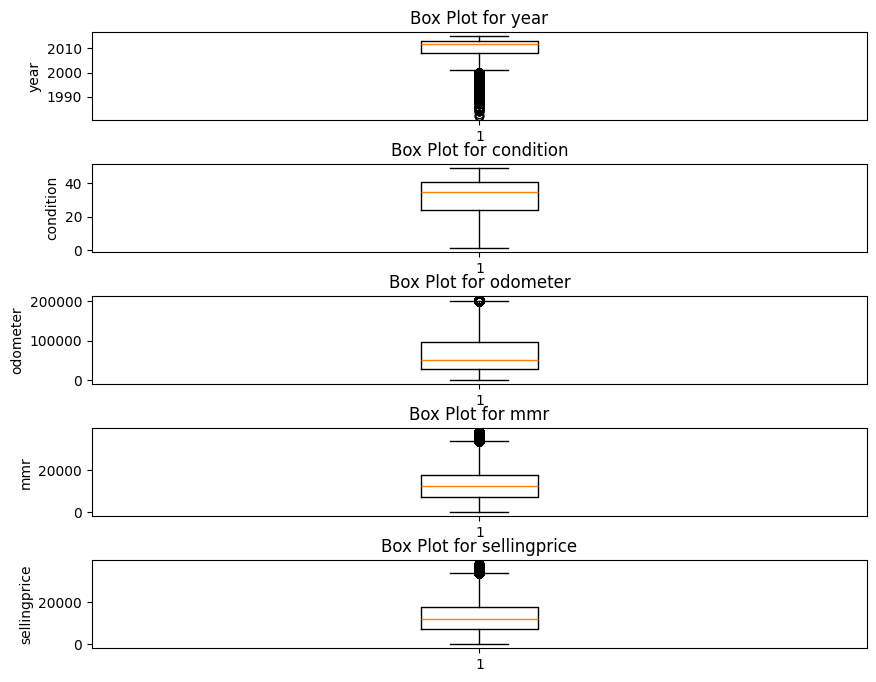

In [21]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numeric_columns):
    axes[i].boxplot(clean_df[column].dropna())
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_ylabel(column)

plt.show()

Kode di atas membuat subplot untuk setiap kolom numerik dalam DataFrame `clean_df` menggunakan boxplot. Subplot disusun dalam satu kolom (ncols=1) dan lima baris (nrows=5) dengan ukuran keseluruhan gambar 10x8. Jarak antar subplot diatur menggunakan `fig.subplots_adjust(hspace=0.5)`.

Untuk setiap kolom numerik dalam daftar `numeric_columns`:
- `axes[i].boxplot(clean_df[column].dropna())` menggambar boxplot untuk kolom tersebut di subplot yang sesuai.
- `axes[i].set_title(f'Box Plot for {column}')` memberikan judul untuk subplot dengan nama kolom.
- `axes[i].set_ylabel(column)` memberikan label sumbu y untuk subplot dengan nama kolom.

Akhirnya, `plt.show()` digunakan untuk menampilkan plot.

Ini memberikan pemahaman visual tentang distribusi data dan keberadaan outlier dalam setiap kolom numerik dalam DataFrame `clean_df`.

In [22]:
df = clean_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534360 entries, 0 to 558836
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          534360 non-null  int64  
 1   condition     534360 non-null  float64
 2   odometer      534360 non-null  float64
 3   mmr           534360 non-null  float64
 4   sellingprice  534360 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 24.5 MB


Setelah diganti DataFrame df dengan clean_df, sekarang kita akan melihat informasi terbaru tentang struktur DataFrame df dengan menggunakan df.info().

Namun, karena telah diganti DataFrame df dengan clean_df, DataFrame df sekarang akan memiliki jumlah baris dan kolom yang berbeda dari sebelumnya, dan nilai-nilai yang hilang atau outlier sudah dihapus.

In [23]:
df

,year,condition,odometer,mmr,sellingprice
0,2015,5.0,16639.0,20500.0,21500.0
1,2015,5.0,9393.0,20800.0,21500.0
2,2014,45.0,1331.0,31900.0,30000.0
3,2015,41.0,14282.0,27500.0,27750.0
5,2015,1.0,5554.0,15350.0,10900.0
...,...,...,...,...,...
558832,2015,45.0,18255.0,35300.0,33000.0
558833,2012,5.0,54393.0,30200.0,30800.0
558834,2012,48.0,50561.0,29800.0,34000.0
558835,2015,38.0,16658.0,15100.0,11100.0


## **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) adalah suatu pendekatan analisis data yang digunakan untuk memahami karakteristik utama dari dataset yang diberikan. Tujuan utama dari EDA adalah untuk mengungkapkan struktur dan pola dalam data melalui teknik visualisasi dan ringkasan statistik. Ini membantu analis data untuk memahami sifat-sifat intrinsik dari data, menemukan hubungan antara variabel, mengidentifikasi anomali atau pola menarik, dan merumuskan hipotesis yang mungkin untuk diuji lebih lanjut.

Beberapa teknik umum yang digunakan dalam EDA meliputi:
- Visualisasi data: seperti histogram, scatter plot, box plot, dan heatmaps untuk menampilkan distribusi, hubungan, dan pola dalam data.
- Statistik deskriptif: seperti mean, median, standar deviasi, dan persentil untuk memberikan ringkasan statistik tentang data.
- Analisis korelasi: untuk mengeksplorasi hubungan antara variabel menggunakan koefisien korelasi atau metode lainnya.
- Analisis frekuensi: untuk memahami distribusi dan frekuensi kemunculan nilai-nilai dalam variabel kategorikal.

EDA merupakan langkah awal yang penting dalam proses analisis data, karena membantu untuk mengidentifikasi pertanyaan yang relevan, menentukan metode analisis yang sesuai, dan menghasilkan wawasan awal yang dapat digunakan untuk pengambilan keputusan lebih lanjut.


**1. Feature Understanding**

Feature understanding adalah proses memahami variabel atau fitur (features) yang ada dalam dataset. Ini melibatkan pemahaman mendalam tentang setiap variabel, termasuk karakteristik, makna, dan pengaruhnya terhadap fenomena yang diamati.

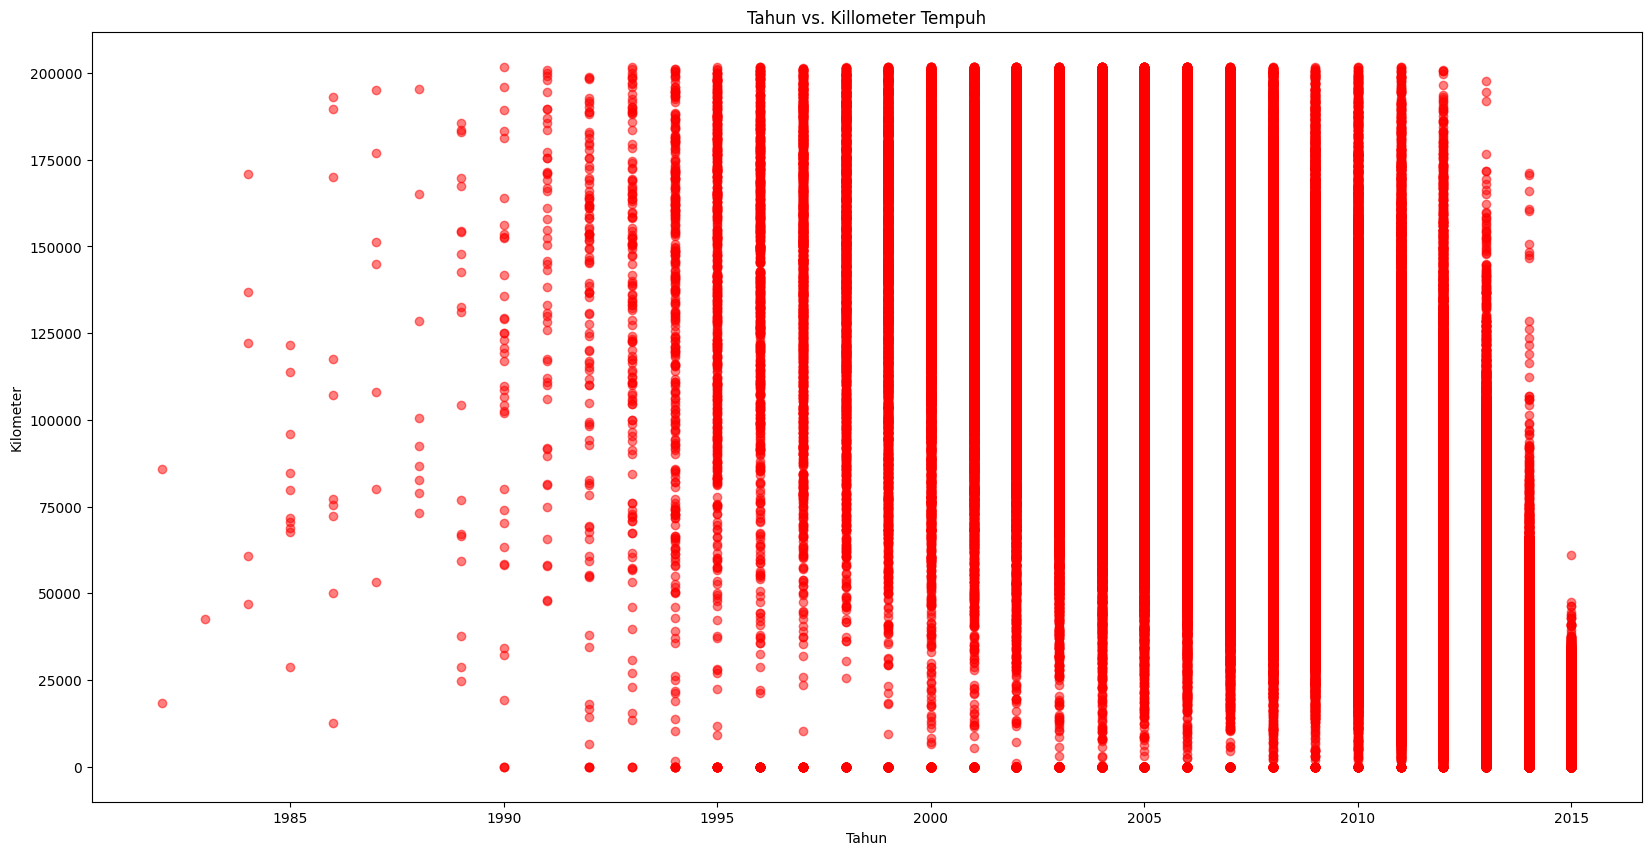

In [24]:
plt.figure(figsize=(20, 10))

plt.scatter(df['year'], df['odometer'], alpha=0.5, c='red')
plt.title('Tahun vs. Killometer Tempuh')
plt.xlabel('Tahun')
plt.ylabel('Kilometer')
plt.show()

Potongan kode tersebut adalah untuk membuat scatter plot yang menampilkan hubungan antara variabel 'year' (tahun) dan 'odometer' (kilometer tempuh) dari DataFrame `df`. Berikut adalah penjelasan untuk setiap baris kode:

1. `plt.figure(figsize=(20, 10))`: Mendefinisikan ukuran gambar (figure) dengan panjang 20 inch dan lebar 10 inch menggunakan `figsize`. Ini memungkinkan untuk mengontrol ukuran plot yang dihasilkan.

2. `plt.scatter(df['year'], df['odometer'], alpha=0.5, c='red')`: Membuat scatter plot dengan menggunakan nilai 'year' sebagai sumbu x dan nilai 'odometer' sebagai sumbu y. Setiap titik dalam plot akan mewakili satu data kendaraan dalam DataFrame `df`. Parameter `alpha=0.5` digunakan untuk mengatur transparansi titik-titik sehingga plot lebih mudah dibaca jika ada tumpang tindih. Parameter `c='red'` digunakan untuk menetapkan warna merah pada titik-titik dalam plot.

3. `plt.title('Tahun vs. Kilometer Tempuh')`: Menetapkan judul untuk plot, yaitu 'Tahun vs. Kilometer Tempuh'. Ini membantu dalam memberikan konteks tentang apa yang ditampilkan dalam plot.

4. `plt.xlabel('Tahun')`: Menetapkan label sumbu x sebagai 'Tahun'. Ini memberikan informasi tentang variabel yang ditampilkan pada sumbu x.

5. `plt.ylabel('Kilometer')`: Menetapkan label sumbu y sebagai 'Kilometer'. Ini memberikan informasi tentang variabel yang ditampilkan pada sumbu y.

6. `plt.show()`: Menampilkan plot yang telah dibuat. Ini adalah langkah terakhir dalam membuat plot dan menampilkan hasilnya kepada pengguna.

Dengan demikian, potongan kode tersebut menghasilkan scatter plot yang memvisualisasikan hubungan antara tahun pembuatan kendaraan dan jarak tempuhnya. Plot ini membantu dalam pemahaman visual tentang pola dan tren dalam data.

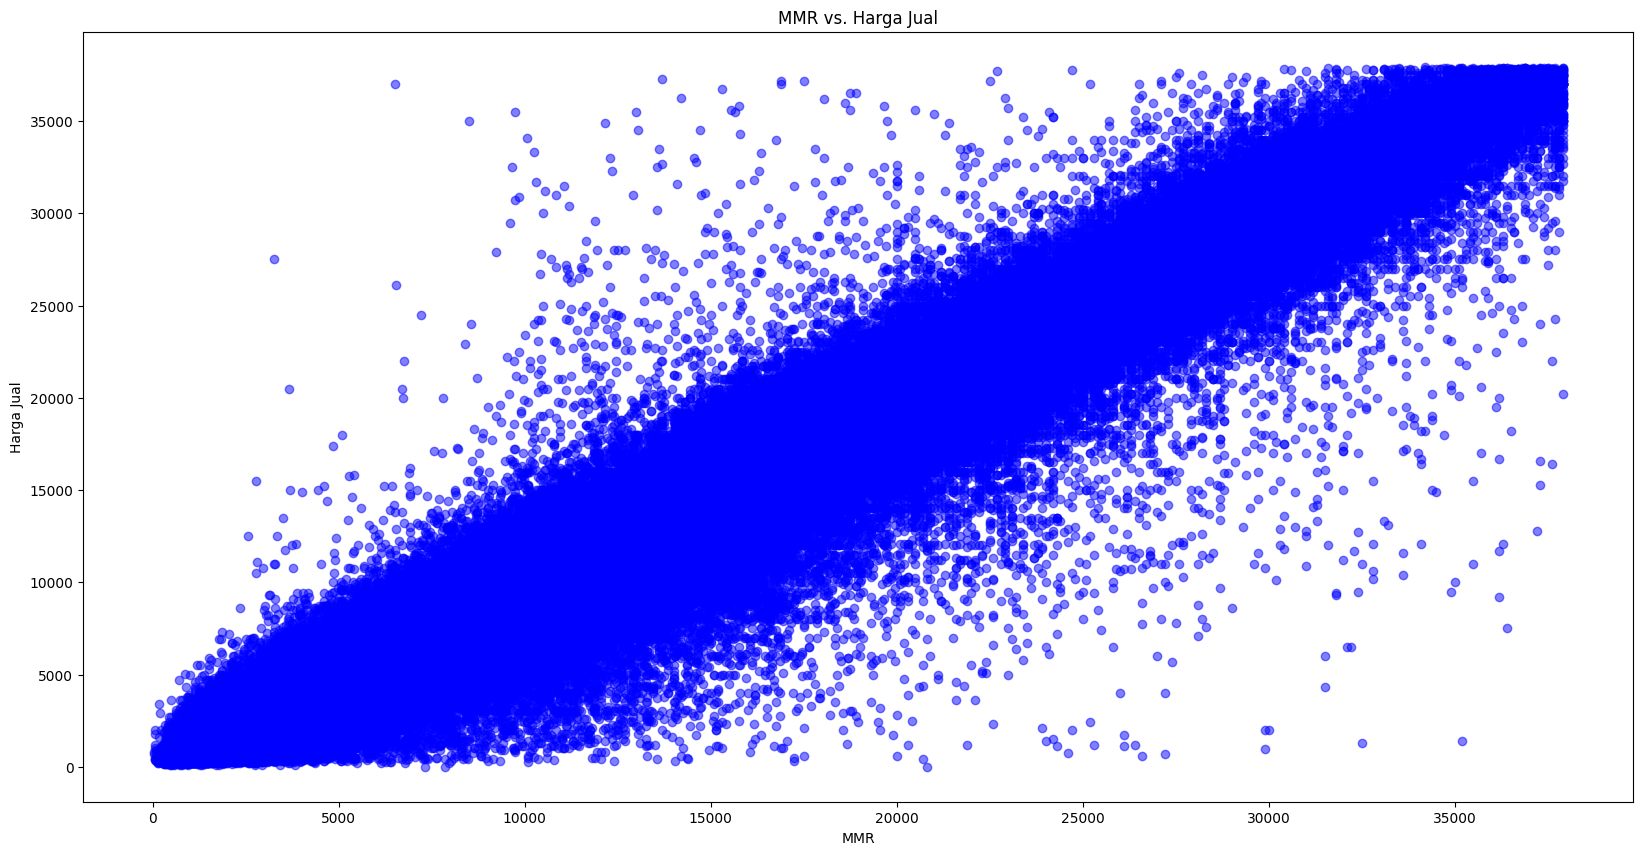

In [25]:
plt.figure(figsize=(20, 10))

plt.scatter(df['mmr'], df['sellingprice'], alpha=0.5, c='blue')
plt.title('MMR vs. Harga Jual')
plt.xlabel('MMR')
plt.ylabel('Harga Jual')
plt.show()

Potongan kode tersebut adalah untuk membuat scatter plot yang menampilkan hubungan antara variabel 'mmr' (Laporan Pasar Manheim) dan 'sellingprice' (Harga Jual) dari DataFrame `df`. Berikut adalah penjelasan untuk setiap baris kode:

1. `plt.figure(figsize=(20, 10))`: Mendefinisikan ukuran gambar (figure) dengan panjang 20 inch dan lebar 10 inch menggunakan `figsize`. Ini memungkinkan untuk mengontrol ukuran plot yang dihasilkan.

2. `plt.scatter(df['mmr'], df['sellingprice'], alpha=0.5, c='blue')`: Membuat scatter plot dengan menggunakan nilai 'mmr' sebagai sumbu x dan nilai 'sellingprice' sebagai sumbu y. Setiap titik dalam plot akan mewakili satu data kendaraan dalam DataFrame `df`. Parameter `alpha=0.5` digunakan untuk mengatur transparansi titik-titik sehingga plot lebih mudah dibaca jika ada tumpang tindih. Parameter `c='blue'` digunakan untuk menetapkan warna biru pada titik-titik dalam plot.

3. `plt.title('MMR vs. Harga Jual')`: Menetapkan judul untuk plot, yaitu 'MMR vs. Harga Jual'. Ini membantu dalam memberikan konteks tentang apa yang ditampilkan dalam plot.

4. `plt.xlabel('MMR')`: Menetapkan label sumbu x sebagai 'MMR'. Ini memberikan informasi tentang variabel yang ditampilkan pada sumbu x.

5. `plt.ylabel('Harga Jual')`: Menetapkan label sumbu y sebagai 'Harga Jual'. Ini memberikan informasi tentang variabel yang ditampilkan pada sumbu y.

6. `plt.show()`: Menampilkan plot yang telah dibuat. Ini adalah langkah terakhir dalam membuat plot dan menampilkan hasilnya kepada pengguna.

Dengan demikian, potongan kode tersebut menghasilkan scatter plot yang memvisualisasikan hubungan antara nilai MMR dan harga jual kendaraan. Plot ini membantu dalam pemahaman visual tentang pola dan tren dalam data terkait dengan nilai pasar dan harga jual kendaraan.

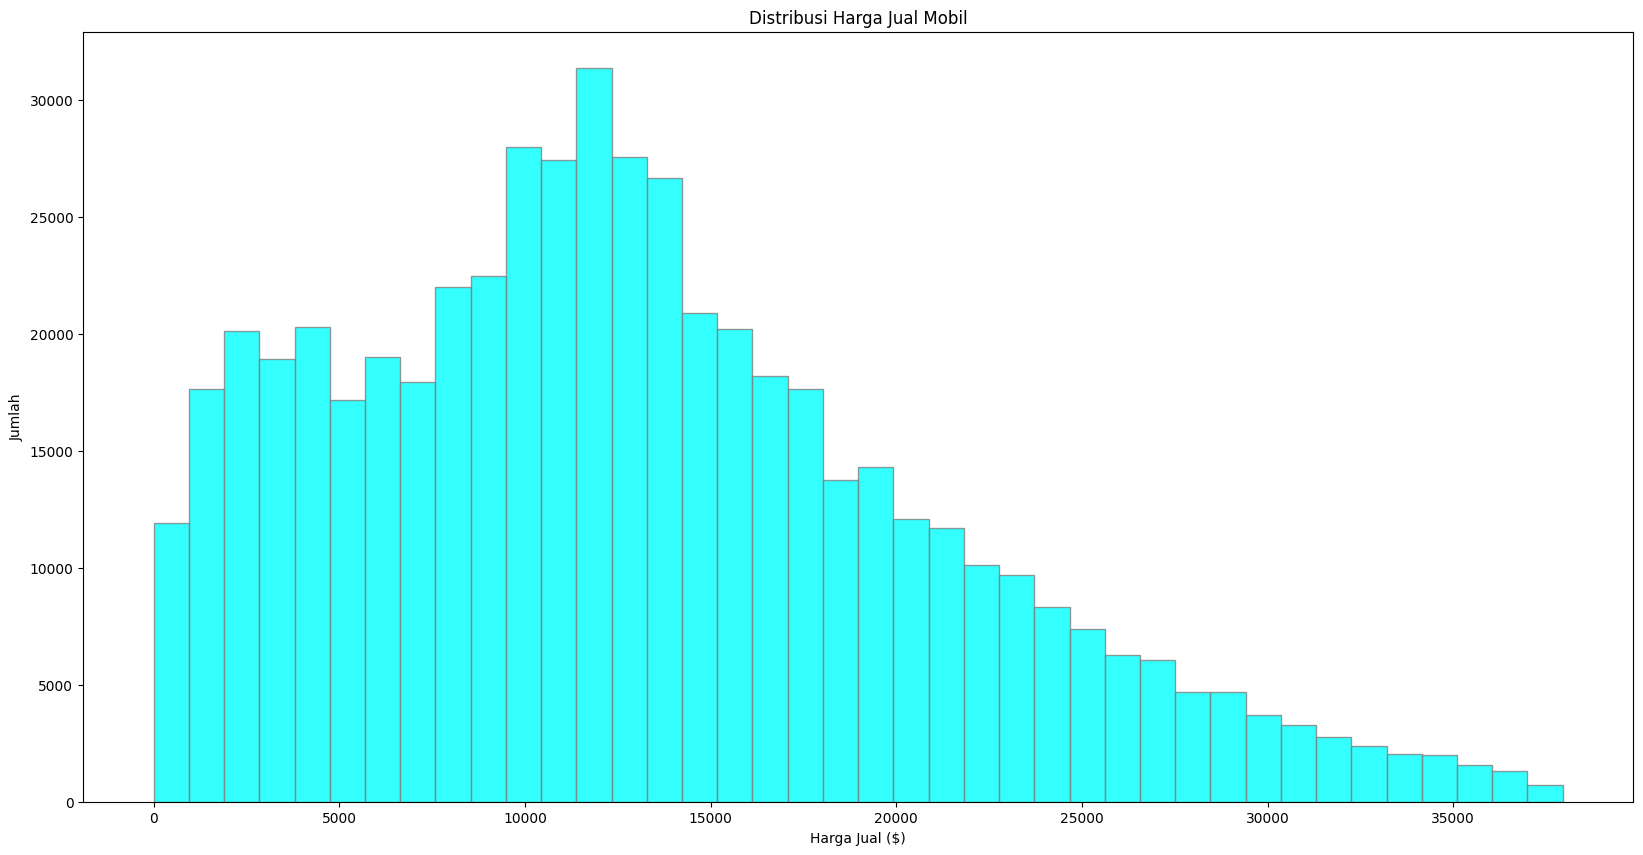

In [27]:
plt.figure(figsize=(20, 10))

plt.hist(df['sellingprice'], alpha=0.8, bins=40, color='cyan', edgecolor='grey')
plt.title('Distribusi Harga Jual Mobil')
plt.xlabel('Harga Jual ($)')
plt.ylabel('Jumlah')
plt.show()

Potongan kode tersebut digunakan untuk membuat histogram yang menampilkan distribusi harga jual mobil dari DataFrame `df`. Berikut adalah penjelasan untuk setiap baris kode:

1. `plt.figure(figsize=(20, 10))`: Mendefinisikan ukuran gambar (figure) dengan panjang 20 inci dan lebar 10 inci menggunakan `figsize`. Ini memungkinkan untuk mengontrol ukuran plot yang dihasilkan.

2. `plt.hist(df['sellingprice'], alpha=0.8, bins=40, color='cyan', edgecolor='grey')`: Membuat histogram dari data harga jual ('sellingprice'). Parameter `alpha=0.8` digunakan untuk mengatur transparansi histogram sehingga lebih mudah dibaca. Parameter `bins=40` menentukan jumlah bin atau interval yang akan digunakan dalam histogram. Parameter `color='cyan'` digunakan untuk menetapkan warna cyan pada histogram. Parameter `edgecolor='grey'` digunakan untuk menetapkan warna abu-abu pada tepi histogram.

3. `plt.title('Distribusi Harga Jual Mobil')`: Menetapkan judul untuk plot, yaitu 'Distribusi Harga Jual Mobil'. Ini membantu dalam memberikan konteks tentang apa yang ditampilkan dalam plot.

4. `plt.xlabel('Harga Jual ($)')`: Menetapkan label sumbu x sebagai 'Harga Jual ($)', yang merupakan unit dalam dolar. Ini memberikan informasi tentang variabel yang ditampilkan pada sumbu x.

5. `plt.ylabel('Jumlah')`: Menetapkan label sumbu y sebagai 'Jumlah', yang merupakan jumlah observasi atau frekuensi dalam setiap bin. Ini memberikan informasi tentang variabel yang ditampilkan pada sumbu y.

6. `plt.show()`: Menampilkan histogram yang telah dibuat. Ini adalah langkah terakhir dalam membuat plot dan menampilkan hasilnya kepada pengguna.

Dengan demikian, potongan kode tersebut menghasilkan histogram yang memvisualisasikan distribusi harga jual mobil dalam dataset. Histogram ini membantu dalam pemahaman tentang sebaran harga jual dan frekuensi kemunculan nilai-nilai harga jual dalam data.

**2. Correlation Matrix**

Matriks korelasi adalah representasi visual dari hubungan antara variabel dalam sebuah dataset. Ini adalah tabel yang menunjukkan koefisien korelasi antara setiap pasangan variabel dalam dataset. Koefisien korelasi mengukur seberapa erat hubungan linier antara dua variabel, dengan nilai yang berkisar antara -1 hingga 1:

- Nilai 1 menunjukkan korelasi positif sempurna, yang berarti bahwa kedua variabel bergerak searah secara linier.
- Nilai -1 menunjukkan korelasi negatif sempurna, yang berarti bahwa kedua variabel bergerak berlawanan arah secara linier.
- Nilai 0 menunjukkan tidak adanya korelasi linier antara variabel, meskipun bisa saja ada hubungan non-linier.

Matriks korelasi biasanya disajikan dalam bentuk tabel persegi, di mana setiap sel diisi dengan koefisien korelasi antara dua variabel yang sesuai. Seringkali, matriks korelasi diwakili secara visual dengan warna, di mana nilai yang lebih tinggi atau lebih positif ditampilkan dengan warna yang lebih terang, sementara nilai yang lebih rendah atau lebih negatif ditampilkan dengan warna yang lebih gelap.

Matriks korelasi adalah alat yang berguna dalam analisis data karena membantu dalam mengidentifikasi hubungan antara variabel, memahami pola dalam data, dan menentukan variabel mana yang paling berpengaruh dalam menjelaskan variasi dalam dataset. Ini juga dapat digunakan untuk memilih variabel yang paling relevan dalam pemodelan statistik atau machine learning.

In [28]:
corr_matrix = df[numeric_columns].dropna().corr()
corr_matrix

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.304472,-0.786131,0.653318,0.638587
condition,0.304472,1.000000,-0.287774,0.286182,0.336134
odometer,-0.786131,-0.287774,1.000000,-0.655649,-0.646952
mmr,0.653318,0.286182,-0.655649,1.000000,0.978421
sellingprice,0.638587,0.336134,-0.646952,0.978421,1.000000


Potongan kode tersebut digunakan untuk menghasilkan matriks korelasi antara variabel numerik dalam DataFrame `df`. Berikut adalah penjelasan untuk setiap baris kode:

1. `df[numeric_columns]`: Memilih kolom-kolom numerik dalam DataFrame `df`. `numeric_columns` adalah daftar nama kolom yang berisi variabel numerik yang ingin dimasukkan ke dalam analisis korelasi. Ini memastikan bahwa hanya variabel numerik yang akan digunakan dalam perhitungan korelasi.

2. `.dropna()`: Metode ini digunakan untuk menghapus baris yang mengandung nilai null dari DataFrame yang dipilih. Ini diperlukan untuk memastikan bahwa korelasi hanya dihitung dari data yang lengkap, karena korelasi tidak dapat dihitung jika ada nilai null dalam dataset.

3. `.corr()`: Metode ini digunakan untuk menghitung matriks korelasi antara variabel-variabel numerik yang dipilih. Ini menghasilkan tabel persegi yang menunjukkan koefisien korelasi antara setiap pasangan variabel. Setiap sel di dalam matriks akan berisi koefisien korelasi antara dua variabel yang sesuai. 

Jadi, `corr_matrix` akan berisi matriks korelasi yang menunjukkan seberapa erat hubungan linier antara setiap pasangan variabel numerik dalam DataFrame `df`. Ini membantu dalam memahami hubungan antara variabel dan dapat memberikan wawasan tentang bagaimana variabel-variabel tersebut berkaitan satu sama lain dalam dataset.

<Axes: >

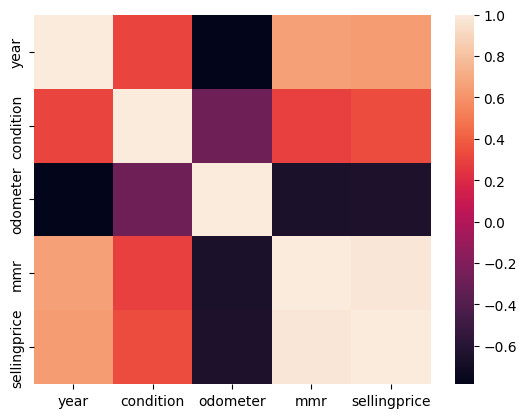

In [29]:
import seaborn as sns

sns.heatmap(corr_matrix)

Potongan kode tersebut menggunakan library Seaborn untuk membuat heatmap (peta panas) dari matriks korelasi yang dihasilkan sebelumnya. Berikut adalah penjelasan untuk kode tersebut:

1. `import seaborn as sns`: Mengimpor library Seaborn yang digunakan untuk membuat visualisasi data statistik.

2. `sns.heatmap(corr_matrix)`: Memanggil fungsi `heatmap()` dari library Seaborn untuk membuat heatmap dari matriks korelasi `corr_matrix`. Heatmap ini akan menampilkan representasi visual dari koefisien korelasi antara setiap pasangan variabel numerik dalam DataFrame. Semakin tinggi koefisien korelasi antara dua variabel, semakin terang warna di dalam sel matriks, sedangkan semakin rendah koefisien korelasinya, semakin gelap warnanya. Ini membantu dalam mengidentifikasi hubungan yang signifikan antara variabel dan memperoleh pemahaman yang lebih baik tentang struktur data.

Penggunaan heatmap ini memudahkan dalam memvisualisasikan dan mengeksplorasi korelasi dalam dataset dengan cara yang lebih intuitif dan informatif. Hal ini memungkinkan untuk dengan cepat mengidentifikasi pola dan hubungan antara variabel, yang dapat menjadi langkah awal dalam proses analisis data yang lebih mendalam.

#### **Kesimpulan EDA**

1. **Pemahaman Atribut Data**: EDA memungkinkan untuk memahami atribut-atribut data dengan lebih baik. Dari informasi yang diberikan sebelumnya, kita telah mengidentifikasi atribut-atribut numerik dan kategorikal dalam dataset, seperti tahun pembuatan kendaraan, kondisi, jarak tempuh, harga jual, dan atribut-atribut lainnya. Ini membantu dalam memahami karakteristik utama dari dataset.

2. **Visualisasi dan Analisis Distribusi**: EDA memungkinkan untuk memvisualisasikan distribusi dari berbagai atribut dalam dataset. Dengan menggunakan histogram dan scatter plot, kita dapat melihat distribusi dan pola hubungan antara variabel seperti kondisi, jarak tempuh, harga jual, dan lain-lain. Misalnya, dari histogram distribusi harga jual mobil, kita dapat melihat bagaimana harga jual mobil tersebar dalam dataset.

3. **Identifikasi Anomali dan Pola Menarik**: Melalui visualisasi data dan ringkasan statistik, EDA dapat membantu dalam mengidentifikasi anomali atau pola menarik dalam dataset. Misalnya, dengan memeriksa scatter plot antara tahun pembuatan dan jarak tempuh kendaraan, kita dapat mengidentifikasi kendaraan-kendaraan dengan jarak tempuh yang tidak biasa untuk tahun pembuatannya.

4. **Korelasi Antar Variabel**: EDA juga memungkinkan untuk mengeksplorasi korelasi antara variabel-variabel dalam dataset. Dengan membuat matriks korelasi dan heatmap, kita dapat melihat seberapa erat hubungan antara variabel-variabel numerik, seperti korelasi antara MMR (Laporan Pasar Manheim) dan harga jual kendaraan.

5. **Pembersihan dan Pemrosesan Data**: EDA juga dapat membantu dalam mengidentifikasi dan menangani nilai-nilai yang hilang atau outlier dalam dataset. Melalui langkah-langkah pembersihan data seperti pengisian nilai yang hilang dan deteksi outlier, kita dapat memastikan kualitas data yang lebih baik sebelum melakukan analisis lebih lanjut.

Dengan demikian, EDA adalah langkah yang penting dalam proses analisis data yang membantu dalam memahami dataset, mengidentifikasi pola dan anomali, serta mempersiapkan data untuk analisis lebih lanjut atau pemodelan. Itu juga dapat memberikan wawasan yang berharga yang dapat digunakan dalam pengambilan keputusan dan pemecahan masalah.


Beberapa kesimpulan yang dapat diambil dari korelasi matriks diatas adalah
1. 'year' dan 'sellingprice' memiliki korelasi positif yang berarti mobil yang lebih baru memiliki harga yang lebih mahal
2. 'year' dan 'odometer' memiiki korelasi negatif, yang berarti semakin tua mobil, semakin tinggi kilometer yang ditempuh
3. 'mmr' dan 'sellingprice' memiliki korelasi positif yang kuat, yang berarti semakin tinggi MMR, semakin tinggi harga jual

## **K-MEANS**

K-Means adalah salah satu algoritma clustering yang paling umum digunakan dalam analisis data. Tujuan utama dari algoritma K-Means adalah untuk membagi dataset menjadi kelompok-kelompok yang homogen, yang disebut sebagai cluster, di mana setiap data dalam sebuah cluster memiliki karakteristik yang serupa. 

Berikut adalah prinsip dasar dari algoritma K-Means:

1. **Inisialisasi centroid**: Algoritma dimulai dengan menginisialisasi centroid (titik pusat) sebanyak K di dalam ruang fitur. Centroid ini adalah representasi dari pusat masing-masing cluster.

2. **Assignment**: Setiap data dalam dataset akan diberikan kepada cluster yang memiliki centroid terdekat dengan data tersebut. Jarak antara data dan centroid dapat diukur menggunakan berbagai metrik jarak, seperti jarak Euclidean.

3. **Pembaruan centroid**: Setelah setiap data diberikan kepada cluster yang sesuai, centroid baru dihitung untuk setiap cluster dengan mengambil rata-rata dari semua data dalam cluster tersebut.

4. **Iterasi**: Langkah 2 dan 3 diulangi sampai tidak ada perubahan dalam penugasan cluster atau hingga iterasi mencapai batas yang ditentukan sebelumnya.

5. **Konvergensi**: Algoritma konvergen ketika tidak ada lagi perubahan dalam penugasan cluster. Pada titik ini, K-Means telah menemukan pengelompokan optimal (atau sub-optimal) untuk dataset yang diberikan.

K-Means memiliki beberapa keunggulan, termasuk sederhana dan efisien dalam mengelompokkan data. Namun, algoritma ini juga memiliki beberapa kelemahan, seperti sensitif terhadap inisialisasi centroid awal dan tidak cocok untuk data yang memiliki bentuk atau ukuran cluster yang tidak teratur.

K-Means sering digunakan dalam berbagai aplikasi, termasuk segmentasi pelanggan, analisis citra, pengelompokan dokumen, dan lain-lain. Hal ini karena kemampuannya untuk mengelompokkan data secara efisien dan efektif, meskipun dengan asumsi tertentu tentang struktur data.

In [30]:
cols = list(df.columns.values)
cols.pop(cols.index('condition'))
df = df[cols+['condition']]

cols = list(df.columns.values)
cols.pop(cols.index('odometer'))
df = df[cols+['odometer']]

cols = list(df.columns.values)
cols.pop(cols.index('sellingprice'))
df = df[cols+['sellingprice']]

df.head()

,year,mmr,condition,odometer,sellingprice
0,2015,20500.0,5.0,16639.0,21500.0
1,2015,20800.0,5.0,9393.0,21500.0
2,2014,31900.0,45.0,1331.0,30000.0
3,2015,27500.0,41.0,14282.0,27750.0
5,2015,15350.0,1.0,5554.0,10900.0


Kode di atas memiliki tujuan untuk memindahkan kolom 'condition', 'odometer', dan 'sellingprice' ke posisi terakhir dalam DataFrame `df`. 

Ini dilakukan dengan cara menghapus kolom yang bersangkutan dari daftar kolom (`cols`), kemudian menambahkannya kembali ke DataFrame di posisi terakhir.

Berikut adalah langkah-langkahnya:

1. Pertama, kode mengonversi nama kolom DataFrame ke dalam daftar Python menggunakan `list(df.columns.values)`. Ini disimpan dalam variabel `cols`.

2. Kemudian, kode menghapus kolom yang ingin dipindahkan dari daftar kolom menggunakan `cols.pop(cols.index('nama_kolom'))`, di mana 'nama_kolom' adalah nama kolom yang ingin dipindahkan.

3. Setelah itu, kode memindahkan kolom yang telah dihapus ke posisi terakhir dalam daftar kolom dengan menambahkannya kembali ke daftar menggunakan `df = df[cols+['nama_kolom']]`.

4. Langkah-langkah ini diulangi untuk setiap kolom yang ingin dipindahkan.

5. Terakhir, `df.head()` digunakan untuk menampilkan lima baris pertama DataFrame `df` yang telah dimodifikasi dengan perubahan urutan kolom.



In [31]:
X = df.iloc[:,2:5].values
X

array([[5.0000e+00, 1.6639e+04, 2.1500e+04],
       [5.0000e+00, 9.3930e+03, 2.1500e+04],
       [4.5000e+01, 1.3310e+03, 3.0000e+04],
       ...,
       [4.8000e+01, 5.0561e+04, 3.4000e+04],
       [3.8000e+01, 1.6658e+04, 1.1100e+04],
       [3.4000e+01, 1.5008e+04, 2.6700e+04]])

Kode `X = df.iloc[:,2:5].values` digunakan untuk mengambil nilai-nilai dari kolom-kolom yang memiliki indeks 2 hingga 4 dari DataFrame `df`, kemudian disimpan dalam variabel `X`.

Penjelasan langkah-langkahnya adalah sebagai berikut:

1. `df.iloc[:,2:5]`: Ini mengambil subset dari DataFrame `df` dengan menggunakan metode `iloc` untuk indexing berbasis posisi. Dalam hal ini, `:` pada indeks pertama berarti memilih semua baris, sedangkan `2:5` pada indeks kedua berarti memilih kolom-kolom dengan indeks 2 hingga 4 (kolom ke-3 hingga ke-5 dalam urutan Python yang dimulai dari 0). Ini mencakup kolom 'odometer', 'mmr', dan 'sellingprice'.

2. `.values`: Ini mengonversi DataFrame subset yang dipilih menjadi array NumPy, sehingga hanya nilai-nilai yang sebenarnya yang diambil, bukan indeks dan label kolomnya.

Hasil dari operasi ini adalah array NumPy `X` yang berisi nilai-nilai dari kolom-kolom yang telah dipilih. Array ini siap digunakan dalam proses analisis selanjutnya, seperti pemodelan atau klasterisasi.

In [32]:
from sklearn.preprocessing import StandardScaler
Normalisasi = StandardScaler().fit_transform(X)
Normalisasi


array([[-1.9699495 , -1.05418269,  1.07476466],
       [-1.9699495 , -1.20982067,  1.07476466],
       [ 1.07516084, -1.38298566,  2.15077601],
       ...,
       [ 1.30354412, -0.32556665,  2.6571343 ],
       [ 0.54226653, -1.05377458, -0.24176689],
       [ 0.2377555 , -1.0892152 ,  1.73303043]])

Kode di atas menggunakan modul `StandardScaler` dari scikit-learn untuk melakukan normalisasi data. Normalisasi adalah proses transformasi data sehingga nilainya memiliki mean nol dan deviasi standar satu.

Langkah-langkahnya adalah sebagai berikut:

1. `from sklearn.preprocessing import StandardScaler`: Mengimpor kelas `StandardScaler` dari modul `sklearn.preprocessing`. `StandardScaler` digunakan untuk melakukan normalisasi data.

2. `Normalisasi = StandardScaler().fit_transform(X)`: Membuat objek `StandardScaler` dan kemudian menggunakan metode `.fit_transform()` untuk menghitung mean dan deviasi standar dari data `X` dan mengaplikasikan normalisasi ke data tersebut. Hasil normalisasi disimpan dalam variabel `Normalisasi`.

3. `Normalisasi`: Ini adalah array NumPy yang berisi data yang telah dinormalisasi. Data ini siap untuk digunakan dalam analisis atau pemodelan yang memerlukan data yang telah dinormalisasi.

Dengan melakukan normalisasi, data diproses sehingga memiliki skala yang seragam, yang dapat meningkatkan kinerja dan konvergensi algoritma machine learning seperti pengklasteran atau regresi.

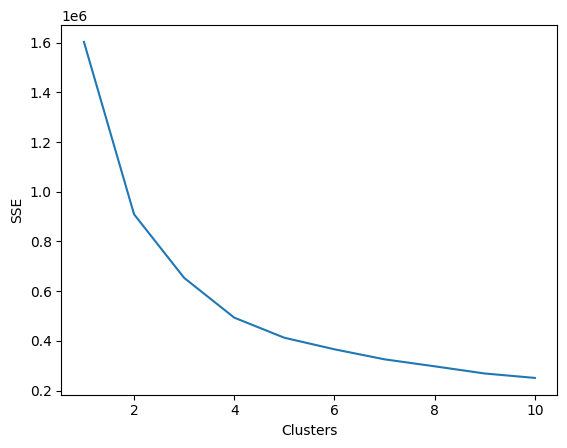

In [33]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i, init='k-means++', random_state=42)
    k_means.fit(Normalisasi)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

**Elbow Method**


Elbow Method adalah teknik yang digunakan untuk menemukan jumlah cluster optimal dalam algoritma clustering, seperti K-Means. Tujuan dari Elbow Method adalah untuk menemukan titik di mana penambahan jumlah cluster tidak lagi signifikan dalam meningkatkan kualitas pengelompokan.

Kode di atas digunakan untuk menghitung Sum of Squared Errors (SSE) untuk berbagai jumlah klaster (cluster) yang berbeda menggunakan metode K-Means. SSE dihitung sebagai jumlah kuadrat jarak setiap titik data dalam setiap klaster terhadap pusat klasternya.

Langkah-langkahnya adalah sebagai berikut:

1. `wcss = []`: Membuat list kosong `wcss` untuk menyimpan SSE untuk setiap jumlah klaster.

2. `for i in range(1,11):`: Melakukan iterasi dari 1 hingga 10 untuk berbagai jumlah klaster.

3. `k_means = KMeans(n_clusters=i, init='k-means++', random_state=42)`: Membuat objek KMeans dengan jumlah klaster sebanyak `i`, menggunakan metode inisialisasi 'k-means++' untuk menentukan titik awal pusat klaster, dan menetapkan nilai `random_state` agar hasilnya dapat direproduksi.

4. `k_means.fit(Normalisasi)`: Melatih model KMeans menggunakan data yang telah dinormalisasi.

5. `wcss.append(k_means.inertia_)`: Menambahkan nilai SSE dari model yang dilatih ke dalam list `wcss`.

6. Plot elbow curve: Menggunakan `plt.plot()` untuk membuat kurva elbow yang menunjukkan hubungan antara jumlah klaster dan SSE.
   - `np.arange(1,11)`: Menghasilkan array dengan rentang nilai dari 1 hingga 10 (inklusif) untuk jumlah klaster.
   - `wcss`: Menjadi sumbu y yang menunjukkan nilai SSE.
   - `plt.xlabel('Clusters')`: Menetapkan label sumbu x sebagai 'Clusters' yang menunjukkan jumlah klaster.
   - `plt.ylabel('SSE')`: Menetapkan label sumbu y sebagai 'SSE' yang menunjukkan nilai SSE.
   - `plt.show()`: Menampilkan plot elbow curve.

Elbow curve digunakan untuk menentukan jumlah optimal klaster di mana penurunan SSE mulai merata. Jumlah klaster yang optimal adalah di mana titik siku terlihat pada kurva elbow.

In [34]:

k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12, random_state=42)
labels = k_means.fit_predict(Normalisasi)
labels

array([2, 2, 0, ..., 0, 1, 0])

Pada kode tersebut, Saya menggunakan model K-Means untuk melakukan pengelompokan data ke dalam 4 klaster. Langkah-langkahnya adalah sebagai berikut:

1. `k_means = KMeans(init="k-means++", n_clusters=4, n_init=12, random_state=42)`: Membuat objek KMeans dengan jumlah klaster sebanyak 4, menggunakan metode inisialisasi 'k-means++' untuk menentukan titik awal pusat klaster, dan menetapkan nilai `random_state` agar hasilnya dapat direproduksi. Jumlah inisialisasi (`n_init`) diatur ke 12, yang berarti KMeans akan dicoba 12 kali dengan inisialisasi yang berbeda dan hasil terbaik akan dipilih.

2. `labels = k_means.fit_predict(Normalisasi)`: Melakukan klasterisasi data yang telah dinormalisasi (`Normalisasi`). Metode `fit_predict()` digunakan untuk melakukan pelatihan model KMeans dan langsung mengembalikan label klaster untuk setiap titik data. Setiap titik data diberi label yang menunjukkan keanggotaannya dalam salah satu klaster.

3. `labels`: Variabel `labels` berisi label klaster untuk setiap titik data setelah klasterisasi. Ini dapat digunakan untuk analisis lebih lanjut, seperti visualisasi atau pemahaman pola dalam data.

In [35]:
df['cluster'] = labels

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]


Pada kode tersebut,  ditambahkan kolom baru 'cluster' ke DataFrame `df` yang berisi label klaster untuk setiap titik data. Kemudian, dibagi DataFrame `df` menjadi empat DataFrame terpisah (`df1`, `df2`, `df3`, dan `df4`) berdasarkan label klaster.

Langkah-langkahnya adalah sebagai berikut:

1. `df['cluster'] = labels`: Menambahkan kolom baru 'cluster' ke DataFrame `df` yang berisi label klaster untuk setiap titik data. Label klaster yang telah dihasilkan sebelumnya disimpan dalam variabel `labels`.

2. `df1 = df[df.cluster==0]`: Membuat DataFrame `df1` yang berisi semua baris dari DataFrame `df` di mana nilai dalam kolom 'cluster' adalah 0 (klaster pertama).

3. `df2 = df[df.cluster==1]`: Membuat DataFrame `df2` yang berisi semua baris dari DataFrame `df` di mana nilai dalam kolom 'cluster' adalah 1 (klaster kedua).

4. `df3 = df[df.cluster==2]`: Membuat DataFrame `df3` yang berisi semua baris dari DataFrame `df` di mana nilai dalam kolom 'cluster' adalah 2 (klaster ketiga).

5. `df4 = df[df.cluster==3]`: Membuat DataFrame `df4` yang berisi semua baris dari DataFrame `df` di mana nilai dalam kolom 'cluster' adalah 3 (klaster keempat).



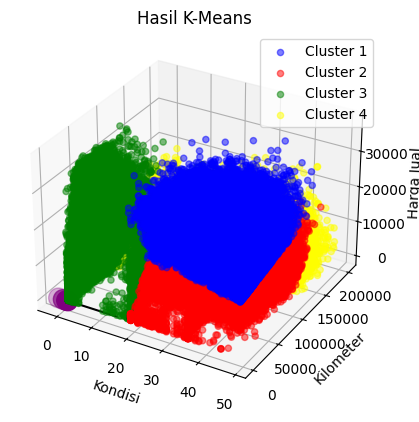

In [36]:
k_means_plot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
k_means_plot.plot3D(xline, yline, zline, 'black')

k_means_plot.scatter3D(df1.condition, df1.odometer, df1.sellingprice,
                       c='blue', label='Cluster 1', alpha=0.5)
k_means_plot.scatter3D(df2.condition, df2.odometer, df2.sellingprice,
                       c='red', label='Cluster 2', alpha=0.5)
k_means_plot.scatter3D(df3.condition, df3.odometer, df3.sellingprice,
                       c='green', label='Cluster 3', alpha=0.5)
k_means_plot.scatter3D(df4.condition, df4.odometer, df4.sellingprice,
                       c='yellow', label='Cluster 4', alpha=0.5)

plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1],
            color = 'purple', s = 200)
plt.legend()
k_means_plot.set_xlabel('Kondisi')
k_means_plot.set_ylabel('Kilometer')
k_means_plot.set_zlabel('Harga Jual')
plt.title("Hasil K-Means")
plt.show()

Dalam kode di atas, digunakan plot 3D untuk memvisualisasikan hasil klasterisasi dari model K-Means. Langkah-langkahnya adalah sebagai berikut:

1. `k_means_plot = plt.axes(projection='3d')`: Membuat subplot dengan proyeksi 3D untuk menggambar plot.

2. `xline`, `yline`, `zline`: Menghasilkan garis-garis koordinat dalam ruang 3D untuk plot latar belakang.

3. `k_means_plot.plot3D(xline, yline, zline, 'black')`: Menggambar plot latar belakang dengan garis koordinat.

4. `k_means_plot.scatter3D()`: Menggunakan metode `scatter3D()` untuk menggambar titik-titik data untuk setiap klaster dalam ruang 3D. Setiap klaster direpresentasikan dengan warna yang berbeda.

5. `plt.scatter()`: Menggunakan `plt.scatter()` untuk menggambar pusat klaster (centroid) dalam plot. Pusat klaster diambil dari atribut `cluster_centers_` dari model K-Means yang telah dilatih.

6. `plt.legend()`: Menambahkan legenda untuk mengidentifikasi setiap klaster.

7. `k_means_plot.set_xlabel()`, `k_means_plot.set_ylabel()`, `k_means_plot.set_zlabel()`: Menetapkan label sumbu untuk masing-masing sumbu koordinat.

8. `plt.title()`: Menetapkan judul untuk plot.

9. `plt.show()`: Menampilkan plot.

Ini memberikan visualisasi 3D dari hasil klasterisasi, di mana sumbu x mewakili 'Kondisi', sumbu y mewakili 'Kilometer', dan sumbu z mewakili 'Harga Jual'. Setiap titik data diplot dalam warna yang sesuai dengan klasternya, dan pusat klaster ditandai dengan titik berwarna ungu.

# **KESIMPULAN**

Berdasarkan hasil klasterisasi yang divisualisasikan dalam grafik 3D, dapat diperhatikan bahwa data terbagi menjadi empat klaster yang berbeda. Berikut adalah analisis yang lebih rinci terhadap masing-masing klaster:

1. **Cluster 1**:
   - Terdiri dari kendaraan dengan jarak tempuh relatif dekat.
   - Kondisi kendaraan cenderung baik.
   - Harga jual kendaraan relatif murah.
   - Kesimpulan: Klaster ini mungkin mencakup kendaraan yang masih dalam kondisi baik tetapi memiliki jarak tempuh yang lebih tinggi, yang dapat menyebabkan harga jual yang lebih rendah.

2. **Cluster 2**:
   - Terdiri dari kendaraan dengan jarak tempuh relatif dekat.
   - Kondisi kendaraan relatif baik.
   - Harga jual kendaraan lebih mahal dibandingkan dengan Cluster 1.
   - Kesimpulan: Klaster ini mungkin mencakup kendaraan yang masih dalam kondisi baik dengan jarak tempuh yang relatif rendah, yang dapat menjadikan harga jualnya lebih tinggi.

3. **Cluster 3**:
   - Terdiri dari kendaraan dengan jarak tempuh yang sudah cukup jauh.
   - Kondisi kendaraan bervariasi dari baik hingga buruk.
   - Harga jual kendaraan relatif murah.
   - Kesimpulan: Klaster ini mungkin mencakup kendaraan yang telah menempuh jarak yang cukup jauh dengan berbagai kondisi, yang mengakibatkan harga jual yang lebih rendah.

4. **Cluster 4**:
   - Terdiri dari kendaraan dengan jarak tempuh relatif dekat.
   - Kondisi kendaraan cenderung buruk.
   - Harga jual kendaraan bervariasi.
   - Kesimpulan: Klaster ini mungkin mencakup kendaraan yang masih memiliki jarak tempuh yang rendah tetapi kondisinya sudah buruk, sehingga harga jualnya bervariasi tergantung pada kondisi spesifik kendaraan.

Kesimpulannya, analisis klasterisasi ini dapat memberikan wawasan yang berharga tentang bagaimana kendaraan berkelompok berdasarkan jarak tempuh, kondisi, dan harga jualnya. Ini dapat membantu dalam pengambilan keputusan, seperti penetapan harga atau strategi pemasaran untuk setiap kelompok kendaraan.